In [12]:
import ee
import numpy as np
from osgeo import gdal
from osgeo import osr
import time
import geopandas as gp
import matplotlib.pyplot as plt

# init the ee object
ee.Initialize()


In [21]:
arr = np.loadtxt("../data/et_trends.txt")

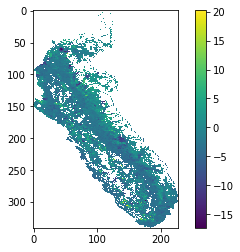

In [22]:
plt.imshow(arr*100)
plt.colorbar()

In [23]:
cv = gp.read_file("../shape/cv_hu6.shp")
lls = cv.geometry.iloc[0]
x,y = lls.exterior.coords.xy
coords = [list(zip(x,y))]

area = ee.Geometry.Polygon(coords)

###### SATELLITES ######

modis = ee.ImageCollection('MODIS/006/MOD16A2').filterBounds(area).filterDate("2010-01-01","2010-03-01#").sum()
 
# get the lat lon and add the ndvi
latlon = ee.Image.pixelLonLat()#.addBands("ET")
 
# apply reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.toList(),
  geometry=area,
  maxPixels=1e8,
  scale=2500);

# get data into three different arrays
# data = np.array((ee.Array(latlon.get("ET")).getInfo()))
lats = np.array((ee.Array(latlon.get("latitude")).getInfo()))
lons = np.array((ee.Array(latlon.get("longitude")).getInfo()))
 
# get the unique coordinates
uniqueLats = np.unique(lats)
uniqueLons = np.unique(lons)
 
# get number of columns and rows from coordinates
ncols = len(uniqueLons)    
nrows = len(uniqueLats)
 
# determine pixelsizes
ys = uniqueLats[1] - uniqueLats[0] 
xs = uniqueLons[1] - uniqueLons[0]

#SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
transform = (np.min(uniqueLons),xs,0,np.max(uniqueLats),0,-ys)
 
# set the coordinate system
target = osr.SpatialReference()
target.ImportFromEPSG(4326)
 
# set driver
driver = gdal.GetDriverByName('GTiff')
outputDataset = driver.Create("test.tif", ncols,nrows, 1,gdal.GDT_Int16)
 
# add some metadata
outputDataset.SetGeoTransform(transform)
outputDataset.SetProjection(target.ExportToWkt())
outputDataset.GetRasterBand(1).WriteArray(arr)
outputDataset = None

print("done")

done


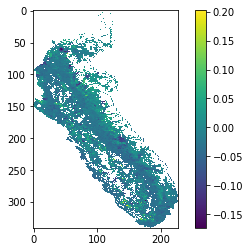

In [24]:
plt.imshow(arr)
plt.colorbar()

In [19]:
arr = np.loadtxt("../data/et_trends.txt")

cv = gp.read_file("../shape/cv_hu6.shp")
lls = cv.geometry.iloc[0]
x,y = lls.exterior.coords.xy
coords = [list(zip(x,y))]

area = ee.Geometry.Polygon(coords)

###### SATELLITES ######

modis = ee.ImageCollection('MODIS/006/MOD16A2').filterBounds(area).filterDate("2010-01-01","2010-03-01#").sum()
 
# get the lat lon and add the ndvi
latlon = ee.Image.pixelLonLat()#.addBands("ET")
 
# apply reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.toList(),
  geometry=area,
  maxPixels=1e8,
  scale=2500);

# get data into three different arrays
# data = np.array((ee.Array(latlon.get("ET")).getInfo()))
lats = np.array((ee.Array(latlon.get("latitude")).getInfo()))
lons = np.array((ee.Array(latlon.get("longitude")).getInfo()))
 
# get the unique coordinates
uniqueLats = np.unique(lats)
uniqueLons = np.unique(lons)
 
# get number of columns and rows from coordinates
ncols = len(uniqueLons)    
nrows = len(uniqueLats)
 
# determine pixelsizes
ys = uniqueLats[1] - uniqueLats[0] 
xs = uniqueLons[1] - uniqueLons[0]

#SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
transform = (np.min(uniqueLons),xs,0,np.max(uniqueLats),0,-ys)
 
# set the coordinate system
target = osr.SpatialReference()
target.ImportFromEPSG(4326)
 
# set driver
driver = gdal.GetDriverByName('GTiff')
outputDataset = driver.Create("hu4_asdf_2.tif", ncols,nrows, 1,gdal.GDT_Float32)
 
# add some metadata
outputDataset.SetGeoTransform(transform)
outputDataset.SetProjection(target.ExportToWkt())
outputDataset.GetRasterBand(1).WriteArray(arr)
outputDataset.GetRasterBand(1).SetNoDataValue(0)

outputDataset = None

print("done")

done
